In [6]:
import numpy as np

import pyabc
from pyabc import Distribution, RV, ABCSMC


def model(p):
    return {
        'y0': p['p0'] + 0.1 * np.random.normal(),
        'y1': p['p1'] + 0.1 * np.random.normal(),
    }

prior = Distribution(p0=RV('uniform', 0, 1),
                     p1=RV('uniform', 0, 100))

obs = {'y0': 0.3, 'y1': 30}
refval = {'p0': 0.3, 'p1': 30}

distances = [
    pyabc.PNormDistance(),
    pyabc.AdaptivePNormDistance(adaptive=False, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.AdaptivePNormDistance(adaptive=True, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=False, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=True)),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False), adaptive=True),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False, n_fit=4), adaptive=True),
    pyabc.PNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(predictor=pyabc.MLPPredictor())),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
        predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=1,
    )),pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
        predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=4,
    )),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=1,
    ),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=4,
    ),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear nn',
    'Learned linear tn',
    'Learned linear tt',
    'Adaptive + LL tn',
    'Adaptive + LL tn n_fit=4',
    'GP',
    'Adaptive GP',
    'MLP',
    'Model selection',
    'Model selection n_fit=4',
    'Info weighted ms',
    'Info weighted ms n_fit=4',
]

def plot_history(history: pyabc.History, label: str):
    fig, ax = plt.subplots(1,2)
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=1, numx=300, refval=refval,
                                        x='p0', xname="$\theta$", ax=ax[0],
                                        label="PDF t={}".format(t))
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=100, numx=300, refval=refval,
                                        x='p1', xname="$\theta$", ax=ax[1],
                                        label="PDF t={}".format(t))
    ax[1].axvline(0, color='k', linestyle='dashed', label="True value")
    ax[1].legend()
    ax[1].set_title(label)

In [4]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=100)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=1e4)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=107, start_time=2021-03-29 00:08:53.014719>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 23.671092074039777
INFO:ABC:t: 0, eps: 23.671092074039777.
INFO:ABC:Acceptance rate: 100 / 228 = 4.3860e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 13.503378910965889.
INFO:ABC:Acceptance rate: 100 / 179 = 5.5866e-01, ESS=9.5968e+01.
INFO:ABC:t: 2, eps: 7.299651468524196.
INFO:ABC:Acceptance rate: 100 / 210 = 4.7619e-01, ESS=9.0663e+01.
INFO:ABC:t: 3, eps: 4.044119758751029.
INFO:ABC:Acceptance rate: 100 / 181 = 5.5249e-01, ESS=9.7310e+01.
INFO:ABC:t: 4, eps: 2.0741074346044868.
INFO:ABC:Acceptance rate: 100 / 186 = 5.3763e-01, ESS=9.6190e+01.
INFO:ABC:t: 5, eps: 0.9176066211081761.
INFO:ABC:Acceptance rate: 100 / 229 = 4.3668e-01, ESS=9.5568e+01.
INFO:ABC:t: 6, eps: 0.5538596091906094.
INFO:ABC:Acceptance rate: 100 / 216 = 4.6296e-01, ESS=9.4897e+01.
INFO:ABC:t: 7, eps: 0.3111232883813899.
INFO:ABC:Acceptance rate: 100 / 207 = 4.8309e-01, ESS=9.5707e+01.
INFO:ABC:t: 8, eps: 0.20188938470762746.
INFO:ABC:Acceptance rate: 100 / 253 = 3.9526e-01, ESS=7.2499e+

Calibrated Euclidean


INFO:Epsilon:initial epsilon is 1.9243100636871486
INFO:ABC:t: 0, eps: 1.9243100636871486.
INFO:ABC:Acceptance rate: 100 / 168 = 5.9524e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.053489089817147.
INFO:ABC:Acceptance rate: 100 / 216 = 4.6296e-01, ESS=9.0679e+01.
INFO:ABC:t: 2, eps: 0.7079830716317834.
INFO:ABC:Acceptance rate: 100 / 221 = 4.5249e-01, ESS=9.0131e+01.
INFO:ABC:t: 3, eps: 0.4836718698330005.
INFO:ABC:Acceptance rate: 100 / 319 = 3.1348e-01, ESS=8.8039e+01.
INFO:ABC:t: 4, eps: 0.33768826855950934.
INFO:ABC:Acceptance rate: 100 / 451 = 2.2173e-01, ESS=8.4094e+01.
INFO:ABC:t: 5, eps: 0.2398914342142697.
INFO:ABC:Acceptance rate: 100 / 584 = 1.7123e-01, ESS=7.0697e+01.
INFO:ABC:t: 6, eps: 0.16450321283966637.
INFO:ABC:Acceptance rate: 100 / 720 = 1.3889e-01, ESS=8.7043e+01.
INFO:ABC:t: 7, eps: 0.11638057259888357.
INFO:ABC:Acceptance rate: 100 / 1012 = 9.8814e-02, ESS=8.6949e+01.
INFO:ABC:t: 8, eps: 0.07855935391045758.
INFO:ABC:Acceptance rate: 100 / 1335 = 7.4906e-02, ESS=8.

Adaptive Euclidean


INFO:Epsilon:initial epsilon is 1.7797546881944708
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.7797546881944708.
INFO:ABC:Acceptance rate: 100 / 206 = 4.8544e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.1559053966541926.
INFO:ABC:Acceptance rate: 100 / 190 = 5.2632e-01, ESS=9.8967e+01.
INFO:ABC:t: 2, eps: 1.2395072369829818.
INFO:ABC:Acceptance rate: 100 / 233 = 4.2918e-01, ESS=9.1988e+01.
INFO:ABC:t: 3, eps: 1.1185458408684354.
INFO:ABC:Acceptance rate: 100 / 304 = 3.2895e-01, ESS=8.4010e+01.
INFO:ABC:t: 4, eps: 0.9304002219956816.
INFO:ABC:Acceptance rate: 100 / 268 = 3.7313e-01, ESS=7.1008e+01.
INFO:ABC:t: 5, eps: 0.9836962282966447.
INFO:ABC:Acceptance rate: 100 / 533 = 1.8762e-01, ESS=7.2466e+01.
INFO:ABC:t: 6, eps: 0.8106331597024656.
INFO:ABC:Acceptance rate: 100 / 440 = 2.2727e-01, ESS=7.9790e+01.
INFO:ABC:t: 7, eps: 0.7790177353061823.
INFO:ABC:Acceptance rate: 100 / 581 = 1.7212e-01, ESS=8.5519e+01.
INFO:ABC:t: 8, eps: 0.7047734014062007.
INFO:

Learned linear nn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 28.349495677817885
INFO:ABC:t: 0, eps: 28.349495677817885.
INFO:ABC:Acceptance rate: 100 / 159 = 6.2893e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 14.422821904682559.
INFO:ABC:Acceptance rate: 100 / 187 = 5.3476e-01, ESS=9.3993e+01.
INFO:ABC:t: 2, eps: 8.455280049501589.
INFO:ABC:Acceptance rate: 100 / 212 = 4.7170e-01, ESS=8.7052e+01.
INFO:ABC:t: 3, eps: 4.711083024838515.
INFO:ABC:Acceptance rate: 100 / 186 = 5.3763e-01, ESS=8.8446e+01.
INFO:ABC:t: 4, eps: 2.5744843335128262.
INFO:ABC:Acceptance rate: 100 / 183 = 5.4645e-01, ESS=8.8517e+01.
INFO:ABC:t: 5, eps: 1.4063791374705072.
INFO:ABC:Acceptance rate: 100 / 180 = 5.5556e-01, ESS=8.5030e+01.
INFO:ABC:t: 6, eps: 0.711554090988699.
INFO:ABC:Acceptance rate: 100 / 246 = 4.0650e-01, ESS=9.7991e+01.
INFO:ABC:t: 7, eps: 0.43266549244973684.
INFO:ABC:Acceptance rate: 100 / 221 = 4.5249e-01, ESS=8.9272e+01.
INFO:ABC:t: 8, eps: 0.32068878009609897.
INFO:ABC:Acceptance rate

Learned linear tn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 23.777668916055816
INFO:ABC:t: 0, eps: 23.777668916055816.
INFO:ABC:Acceptance rate: 100 / 215 = 4.6512e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 12.962407497582975.
INFO:ABC:Acceptance rate: 100 / 199 = 5.0251e-01, ESS=9.6756e+01.
INFO:ABC:t: 2, eps: 7.674191799619258.
INFO:ABC:Acceptance rate: 100 / 169 = 5.9172e-01, ESS=7.9093e+01.
INFO:ABC:t: 3, eps: 3.877670410819143.
INFO:ABC:Acceptance rate: 100 / 207 = 4.8309e-01, ESS=9.8194e+01.
INFO:ABC:t: 4, eps: 1.5793259752753204.
INFO:ABC:Acceptance rate: 100 / 242 = 4.1322e-01, ESS=8.8396e+01.
INFO:ABC:t: 5, eps: 0.829006057150992.
INFO:ABC:Acceptance rate: 100 / 217 = 4.6083e-01, ESS=8.3718e+01.
INFO:ABC:t: 6, eps: 0.5040712099559971.
INFO:ABC:Acceptance rate: 100 / 230 = 4.3478e-01, ESS=9.5119e+01.
INFO:ABC:t: 7, eps: 0.33846109085129206.
INFO:ABC:Acceptance rate: 100 / 241 = 4.1494e-01, ESS=9.2574e+01.
INFO:ABC:t: 8, eps: 0.24383131778453734.
INFO:ABC:Acceptance rate

Learned linear tt


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.4434293394671194
INFO:ABC:t: 0, eps: 1.4434293394671194.
INFO:ABC:Acceptance rate: 100 / 213 = 4.6948e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.9954726975239235.
INFO:ABC:Acceptance rate: 100 / 189 = 5.2910e-01, ESS=9.7098e+01.
INFO:ABC:t: 2, eps: 0.6275104430895725.
INFO:ABC:Acceptance rate: 100 / 253 = 3.9526e-01, ESS=8.7167e+01.
INFO:ABC:t: 3, eps: 0.43856165844625195.
INFO:ABC:Acceptance rate: 100 / 306 = 3.2680e-01, ESS=9.4844e+01.
INFO:ABC:t: 4, eps: 0.31633117608014083.
INFO:ABC:Acceptance rate: 100 / 376 = 2.6596e-01, ESS=8.9789e+01.
INFO:ABC:t: 5, eps: 0.2112899139006887.
INFO:ABC:Acceptance rate: 100 / 440 = 2.2727e-01, ESS=8.9584e+01.
INFO:ABC:t: 6, eps: 0.14413492812006307.
INFO:ABC:Acceptance rate: 100 / 584 = 1.7123e-01, ESS=9.4813e+01.
INFO:ABC:t: 7, eps: 0.10536353417407225.
INFO:ABC:Acceptance rate: 100 / 773 = 1.2937e-01, ESS=7.1354e+01.
INFO:ABC:t: 8, eps: 0.06838692149681297.
INFO:ABC:Acceptanc

Adaptive + LL tn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.4386215503903228
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.4386215503903228.
INFO:ABC:Acceptance rate: 100 / 203 = 4.9261e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.0356219862129554.
INFO:ABC:Acceptance rate: 100 / 241 = 4.1494e-01, ESS=8.6400e+01.
INFO:ABC:t: 2, eps: 0.9502805860622259.
INFO:ABC:Acceptance rate: 100 / 215 = 4.6512e-01, ESS=8.5140e+01.
INFO:ABC:t: 3, eps: 0.8583061397184666.
INFO:ABC:Acceptance rate: 100 / 294 = 3.4014e-01, ESS=8.6939e+01.
INFO:ABC:t: 4, eps: 0.6696153397898856.
INFO:ABC:Acceptance rate: 100 / 421 = 2.3753e-01, ESS=8.8344e+01.
INFO:ABC:t: 5, eps: 0.6668051454657625.
INFO:ABC:Acceptance rate: 100 / 307 = 3.2573e-01, ESS=9.2287e+01.
INFO:ABC:t: 6, eps: 0.6724470429165018.
INFO:ABC:Acceptance rate: 100 / 365 = 2.7397e-01, ESS=3.1323e+01.
INFO:ABC:t: 7, eps: 0.5642690701135895.
INFO:ABC:Acceptance rate: 100 / 447 = 2.2371e-01, ESS=9.0024e+01.
INFO:AB

Adaptive + LL tn n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.524124877254739
INFO:Population:Recording also rejected particles: True
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.524124877254739.
INFO:ABC:Acceptance rate: 100 / 191 = 5.2356e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 1, eps: 0.9026390064653186.
INFO:ABC:Acceptance rate: 100 / 237 = 4.2194e-01, ESS=9.5152e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 2, eps: 0.8933082937843673.
INFO:ABC:Acceptance rate: 100 / 248 = 4.0323e-01, ESS=9.1367e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 3, eps: 0.74814930113122.
INFO:ABC:Acceptance rate: 100 / 299 = 3.3445e-01, ESS=9.2559e+01.
INFO:ABC:t: 4, eps: 0.7060178730733829.
INFO:ABC:Acceptance rate: 100 / 305 = 3.2787e-01, ESS=4.2704e+01.
INFO:ABC:t: 5, eps: 0.720856757403491.
INFO:ABC:Acceptance rate: 100 / 398 = 2.5126e-01, ESS=9.5770e+01.
INFO:ABC:t: 6, eps: 0.5494280539202926.
INFO:ABC:Accep

GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 1.689313750885727
INFO:ABC:t: 0, eps: 1.689313750885727.
INFO:ABC:Acceptance rate: 100 / 191 = 5.2356e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.9153925869498295.
INFO:ABC:Acceptance rate: 100 / 215 = 4.6512e-01, ESS=9.0644e+01.
INFO:ABC:t: 2, eps: 0.5759447510201235.
INFO:ABC:Acceptance rate: 100 / 260 = 3.8462e-01, ESS=9.3067e+01.
INFO:ABC:t: 3, eps: 0.4290063830241775.
INFO:ABC:Acceptance rate: 100 / 240 = 4.1667e-01, ESS=6.1715e+01.
INFO:ABC:t: 4, eps: 0.28306067513720573.
INFO:ABC:Acceptance rate: 100 / 387 = 2.5840e-01, ESS=9.3194e+01.
INFO:ABC:t: 5, eps: 0.21183482761296704.
INFO:ABC:Acceptance rate: 100 / 433 = 2.3095e-01, ESS=6.9143e+01.
INFO:ABC:t: 6, eps: 0.14138852375927868.
INFO:ABC:Acceptance rate: 100 / 763 = 1.3106e-01, ESS=8.5664e+01.
INFO:ABC:t: 7, eps: 0.10287493394758356.
INFO:ABC:Acceptance rate: 100 / 904 = 1.1062e-01, ESS=8.2825e+01.
INFO:ABC:t: 8, eps: 0.07412242329137739.
INFO:ABC:Acceptance rate

Adaptive GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 1.5870055570105366
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.5870055570105366.
INFO:ABC:Acceptance rate: 100 / 200 = 5.0000e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.0416084756675785.
INFO:ABC:Acceptance rate: 100 / 190 = 5.2632e-01, ESS=9.6666e+01.
INFO:ABC:t: 2, eps: 1.0429929065671844.
INFO:ABC:Acceptance rate: 100 / 180 = 5.5556e-01, ESS=9.0355e+01.
INFO:ABC:t: 3, eps: 0.9805366209252037.
INFO:ABC:Acceptance rate: 100 / 231 = 4.3290e-01, ESS=9.2716e+01.
INFO:ABC:t: 4, eps: 0.9149495577186005.
INFO:ABC:Acceptance rate: 100 / 327 = 3.0581e-01, ESS=8.6864e+01.
INFO:ABC:t: 5, eps: 0.6855311127760989.
INFO:ABC:Acceptance rate: 100 / 334 = 2.9940e-01, ESS=6.8093e+01.
INFO:ABC:t: 6, eps: 0.623073197869483.
INFO:ABC:Acceptance rate: 100 / 530 = 1.8868e-01, ESS=5.0480e+01.
INFO:ABC:t: 7, eps: 0.5135004262937737.
INFO:ABC:Acceptance rate: 100 / 577 = 1.7331e-01, ESS=8.1985e+01.
INFO:ABC:t: 

MLP


INFO:Predictor:Fitted MLPPredictor
INFO:Epsilon:initial epsilon is 1.3266525216003637
INFO:ABC:t: 0, eps: 1.3266525216003637.
INFO:ABC:Acceptance rate: 100 / 260 = 3.8462e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.863289470230822.
INFO:ABC:Acceptance rate: 100 / 218 = 4.5872e-01, ESS=9.4795e+01.
INFO:ABC:t: 2, eps: 0.5152560291870322.
INFO:ABC:Acceptance rate: 100 / 307 = 3.2573e-01, ESS=8.9319e+01.
INFO:ABC:t: 3, eps: 0.33573560283118076.
INFO:ABC:Acceptance rate: 100 / 362 = 2.7624e-01, ESS=8.2253e+01.
INFO:ABC:t: 4, eps: 0.25225728708728545.
INFO:ABC:Acceptance rate: 100 / 423 = 2.3641e-01, ESS=9.5943e+01.
INFO:ABC:t: 5, eps: 0.18163125053542095.
INFO:ABC:Acceptance rate: 100 / 508 = 1.9685e-01, ESS=6.7059e+01.
INFO:ABC:t: 6, eps: 0.12966509151373992.
INFO:ABC:Acceptance rate: 100 / 701 = 1.4265e-01, ESS=6.6554e+01.
INFO:ABC:t: 7, eps: 0.08374478188135384.
INFO:ABC:Acceptance rate: 100 / 1118 = 8.9445e-02, ESS=9.1842e+01.
INFO:ABC:t: 8, eps: 0.06293333359771351.
INFO:ABC:Acceptance 

Model selection


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Score LinearPredictor: 1.60e+00
INFO:Predictor:Score GPPredictor: 1.75e+00
INFO:Predictor:Score MLPPredictor: 2.70e+00
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.4477926693578764
INFO:ABC:t: 0, eps: 1.4477926693578764.
INFO:ABC:Acceptance rate: 100 / 212 = 4.7170e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.9759251078915812.
INFO:ABC:Acceptance rate: 100 / 200 = 5.0000e-01, ESS=9.6507e+01.
INFO:ABC:t: 2, eps: 0.64644077

Model selection n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Score LinearPredictor: 1.75e+00
INFO:Predictor:Score GPPredictor: 1.77e+00
INFO:Predictor:Score MLPPredictor: 5.99e+00
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.4989952329328808
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.4989952329328808.
INFO:ABC:Acceptance rate: 100 / 216 = 4.6296e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Pre

Info weighted ms


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Score LinearPredictor: 1.79e+00
INFO:Predictor:Score GPPredictor: 1.81e+00
INFO:Predictor:Score MLPPredictor: 4.98e+00
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 20.37660975779448
INFO:ABC:t: 0, eps: 20.37660975779448.
INFO:ABC:Acceptance rate: 100 / 261 = 3.8314e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 10.639166812565277.
INFO:ABC:Acceptance rate: 100 / 207 = 4.8309e-01, ESS=9.4024e+01.
INFO:ABC:t: 2, eps: 5.2486613762

Info weighted ms n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Score LinearPredictor: 1.71e+00
INFO:Predictor:Score GPPredictor: 1.73e+00
INFO:Predictor:Score MLPPredictor: 3.48e+00
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 21.170594424471073
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 21.170594424471073.
INFO:ABC:Acceptance rate: 100 / 225 = 4.4444e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Pre

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

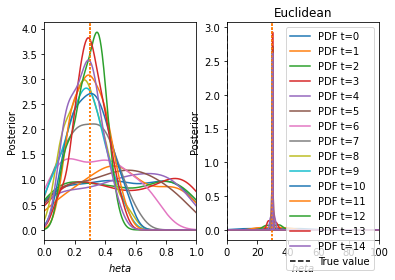

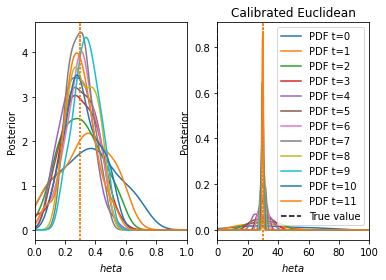

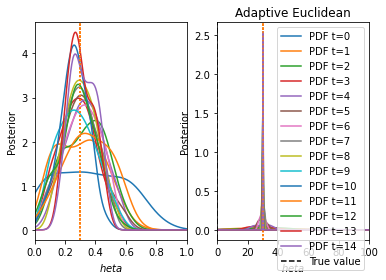

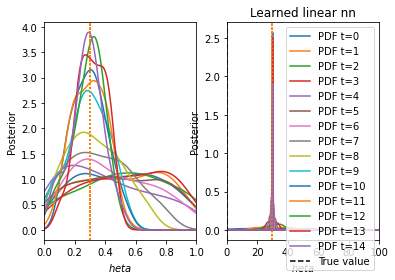

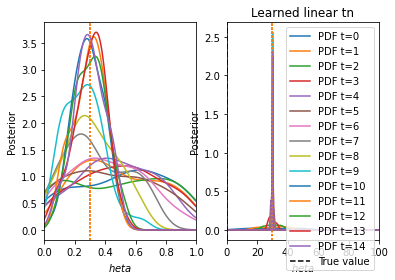

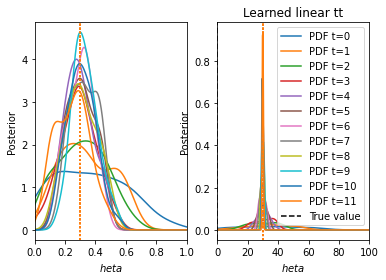

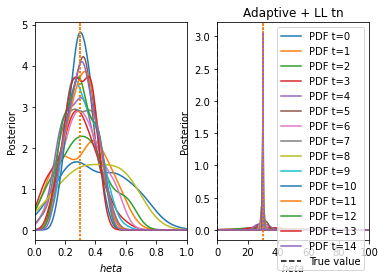

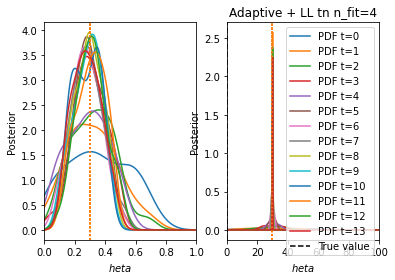

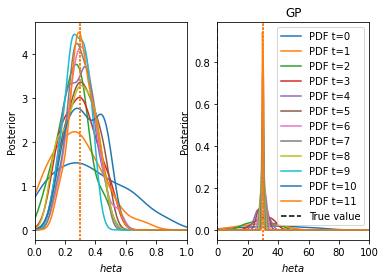

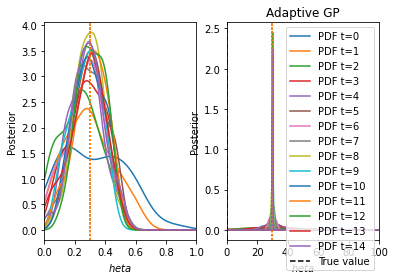

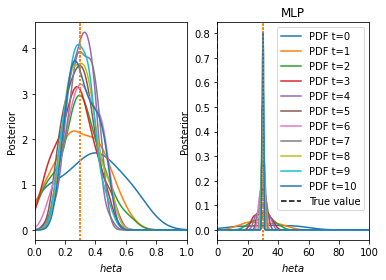

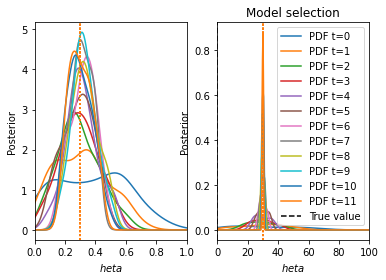

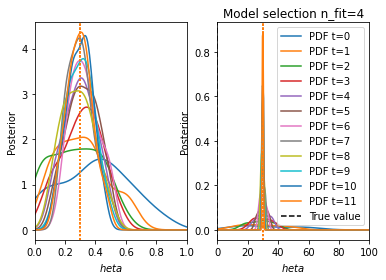

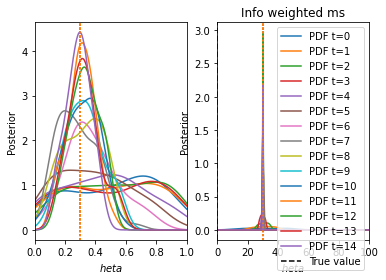

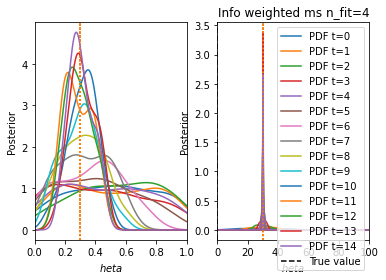

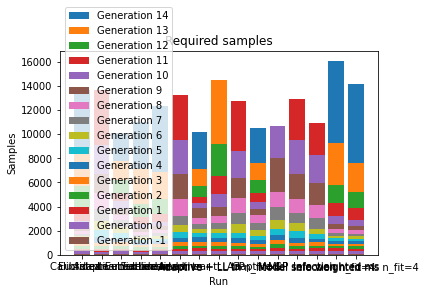

In [7]:
import matplotlib.pyplot as plt

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)